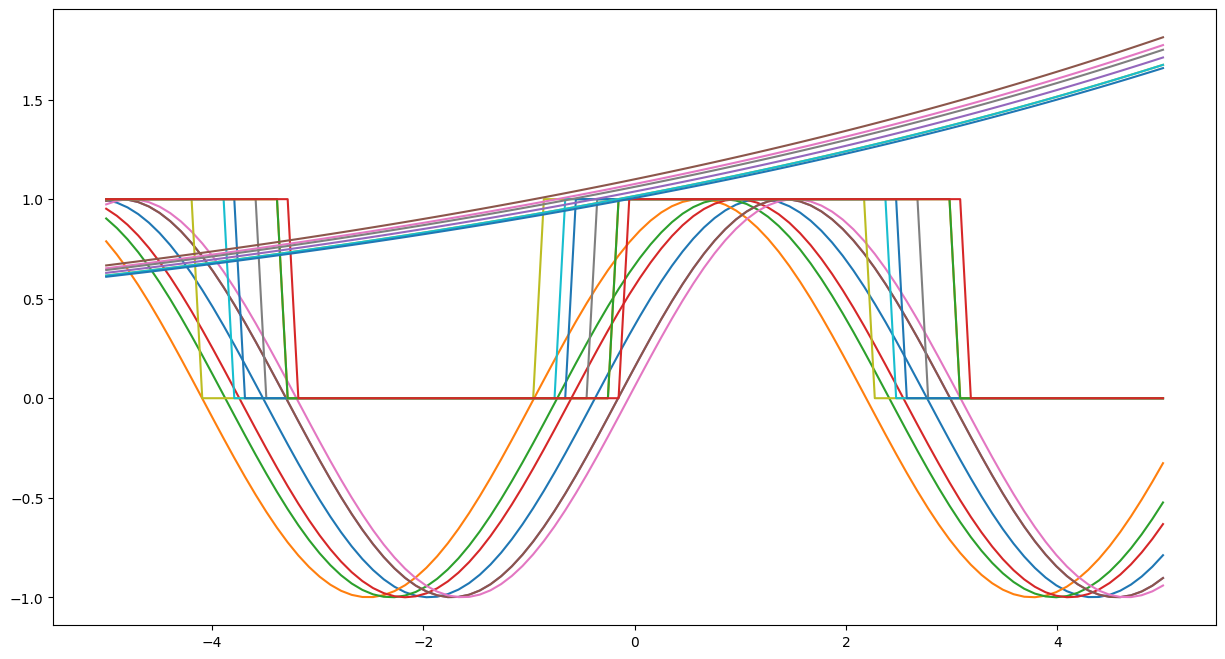

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random

myseed = 42
random.seed(myseed)
np.random.seed(myseed)
     

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def square_wave(x, period=2*np.pi):
    return 0.5 * (1 + np.sign(np.sin(2 * np.pi / period * x)))

def exponential_growth(x, rate=0.1):
    return np.exp(rate * x)

time = np.linspace(-5, 5, num=100)
N = 7
timeseries = {'time': time}
rand = np.random.random(size=7)

# Генерация синусоидальных функций
for i in range(N):
    timeseries[f'sinusoidal{i}'] = np.sin(time + rand[i])

# Генерация ступенчатых (пилообразных) функций
for i in range(N):
    timeseries[f'sawtooth_wave{i}'] = square_wave(time + rand[i])

# Генерация экспоненциальных функций
for i in range(N):
    timeseries[f'exponential_growth{i}'] = exponential_growth(time + rand[i])

# Построение графиков
plt.figure(figsize=(15, 8))
for key, value in timeseries.items():
    if key != 'time':
        plt.plot(time, value, label=key)

plt.show()


In [26]:
!pip install dtaidistance

You should consider upgrading via the 'c:\users\pdd\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [27]:
from dtaidistance import dtw

dtw_dist = np.array([])

# Вычисление расстояния DTW для синусоидальных функций
for i in range(1, N):
    x = np.abs(timeseries[f'sinusoidal{i}'])
    y = np.abs(timeseries[f'sinusoidal{i - 1}'])
    distance = dtw.distance(x, y)
    dtw_dist = np.append(dtw_dist, distance)
    print(f"расстояние dtw для объектов sinusoidal {i} и {7 - i}:", distance)

# Вычисление расстояния DTW для ступенчатых (пилообразных) функций
for i in range(1, N):
    x = np.abs(timeseries[f'sawtooth_wave{i}'])
    y = np.abs(timeseries[f'sawtooth_wave{i - 1}'])
    distance = dtw.distance(x, y)
    dtw_dist = np.append(dtw_dist, distance)
    print(f"расстояние dtw для объектов sawtooth_wave {i} и {7 - i}:", distance)

# Вычисление расстояния DTW для экспоненциальных функций
for i in range(1, N):
    x = np.abs(timeseries[f'exponential_growth{i}'])
    y = np.abs(timeseries[f'exponential_growth{i - 1}'])
    distance = dtw.distance(x, y)
    dtw_dist = np.append(dtw_dist, distance)
    print(f"расстояние dtw для объектов exponential_growth {i} и {7 - i}:", distance)

# Пример сравнения разных классов функций
x = np.abs(timeseries[f'sinusoidal1'])
y = np.abs(timeseries[f'sawtooth_wave1'])
distance = dtw.distance(x, y)
dtw_dist = np.append(dtw_dist, distance)
print(f"расстояние dtw для объектов sinusoidal1 и sawtooth_wave1:", distance)

# Вычисление разницы между значениями
diff = euclidean_dist - dtw_dist
print("На сколько в среднем евклидова метрика больше DTW: ", np.mean(diff))
print("Разница между значениями:", diff)


расстояние dtw для объектов sinusoidal 1 и 6: 0.8131159793889854
расстояние dtw для объектов sinusoidal 2 и 5: 0.2845670460271673
расстояние dtw для объектов sinusoidal 3 и 4: 0.25545729319113525
расстояние dtw для объектов sinusoidal 4 и 3: 0.45743150311923214
расстояние dtw для объектов sinusoidal 5 и 2: 0.00016544099979053404
расстояние dtw для объектов sinusoidal 6 и 1: 0.046638149779533546
расстояние dtw для объектов sawtooth_wave 1 и 6: 0.0
расстояние dtw для объектов sawtooth_wave 2 и 5: 0.0
расстояние dtw для объектов sawtooth_wave 3 и 4: 0.0
расстояние dtw для объектов sawtooth_wave 4 и 3: 0.0
расстояние dtw для объектов sawtooth_wave 5 и 2: 0.0
расстояние dtw для объектов sawtooth_wave 6 и 1: 0.0
расстояние dtw для объектов exponential_growth 1 и 6: 0.17122450517449003
расстояние dtw для объектов exponential_growth 2 и 5: 0.05126380989194817
расстояние dtw для объектов exponential_growth 3 и 4: 0.04489423803805227
расстояние dtw для объектов exponential_growth 4 и 3: 0.121260

Вывод: Для наших классов метрика DTW показывает более точный результат, чем евклидова

In [28]:
X = []
Y = []

for v in timeseries:
    if v != 'time':
        X.append(timeseries[v])
        c = v[:-1]
        if c == "sinusoidal":
            Y.append(1)
        elif c == "sawtooth_wave":
            Y.append(2)
        else: Y.append(3)
 # Если есть другие временные ряды, которые не относятся к классам 1, 2, 3

print(Y)


[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]


train/test

In [29]:

arr = np.arange(len(Y))
np.random.shuffle(arr)

X_train = []
X_test = []
Y_train = []
Y_test = []

for i in arr[:-6]:
    X_train.append(X[i])
    Y_train.append(Y[i])
for i in arr[len(X_train):]:
    X_test.append(X[i])
    Y_test.append(Y[i])

Y_train, Y_test

([3, 3, 1, 3, 2, 2, 3, 2, 2, 1, 1, 3, 1, 2, 2], [3, 1, 1, 2, 1, 3])

In [30]:
!pip install pyts

You should consider upgrading via the 'c:\users\pdd\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Обучение

In [31]:
# dtw метрика
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, Y_train)

print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {Y_test[i]}")

Accuracy 1.0
1 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3
2 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
3 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
4 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
5 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
6 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3


In [32]:
# стандартная метрика
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {Y_test[i]}")

Accuracy 1.0
1 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3
2 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
3 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
4 объект:
Вектор вероятности принадлежности к классам [[0. 1. 0.]]
Истинный класс для предсказаний 2
5 объект:
Вектор вероятности принадлежности к классам [[1. 0. 0.]]
Истинный класс для предсказаний 1
6 объект:
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 3


In [33]:
# forest
from pyts.classification import TimeSeriesForest

clf = TimeSeriesForest(random_state=43)
clf.fit(X_train, Y_train)


print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {Y_test[i]}")

Accuracy 1.0
1 объект:
Вектор вероятности принадлежности к классам [[0.    0.002 0.998]]
Истинный класс для предсказаний 3
2 объект:
Вектор вероятности принадлежности к классам [[0.642 0.256 0.102]]
Истинный класс для предсказаний 1
3 объект:
Вектор вероятности принадлежности к классам [[0.71  0.212 0.078]]
Истинный класс для предсказаний 1
4 объект:
Вектор вероятности принадлежности к классам [[0.018 0.98  0.002]]
Истинный класс для предсказаний 2
5 объект:
Вектор вероятности принадлежности к классам [[0.78  0.166 0.054]]
Истинный класс для предсказаний 1
6 объект:
Вектор вероятности принадлежности к классам [[0.    0.002 0.998]]
Истинный класс для предсказаний 3


Итог: Все классификаторы правильно предсказали принадлежность объектов к классам